In [ ]:
# по урокам https://www.youtube.com/watch?v=EaR3C4e600k&ab_channel=ritvikmath

## Darts

In [90]:
from math import *
from random import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from time import time

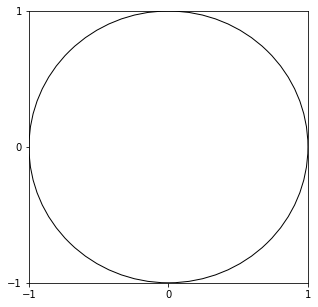

In [91]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

circle = patches.Circle((0,0), 1, facecolor='w', edgecolor = 'k')
ax.add_patch(circle)

plt.show()

In [92]:
# найдем вероятность того, что дротик попадет в круг, математическим способом

rect_square = 4
circle_square = pi

print('вероятность равна:', round(circle_square/rect_square, 5))

вероятность равна: 0.7854


In [93]:
# теперь с помощью метода Монте-Карло

N, circ = 1000000, 0   # количество опытов, сколько раз попали в круг
start = time()

for i in range(N):
    x = random() * 2 - 1
    y = random() * 2 - 1
    if x**2 + y**2 <= 1:
        circ += 1
end = time()

print('вероятность равна:', circ/N)
print('время', round(end - start, 2))

вероятность равна: 0.784752
время 0.72


## Harder Example 

Text(0.5, 1.0, 'Number of Rounds')

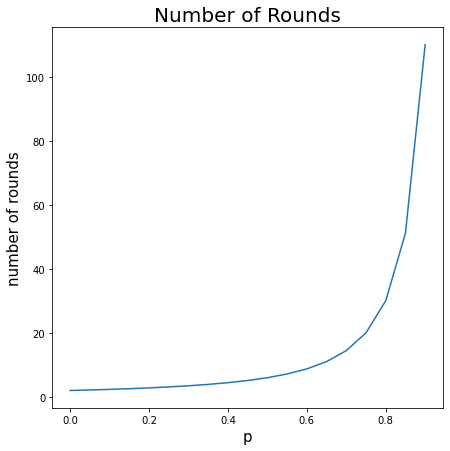

In [94]:
p = np.arange(0, 0.95, 0.05)
e = (2 - p)/(1 - p)**2

plt.figure(figsize = (7,7))
plt.plot(p, e)
plt.xlabel('p', fontsize = 15)
plt.ylabel('number of rounds', fontsize = 15)
plt.title('Number of Rounds', fontsize = 20)

In [95]:
def play_game_MC(p):
    N = 1000000
    rounds = []
    sum_rounds = 0
    len_rounds = 0
    start = time()
    
    for i in range(N):
        r = 0
        nloss = 0
        while nloss != 2:
            r += 1
            if random() < p:
                nloss = 0
            else:
                nloss += 1
        rounds.append(r)
        sum_rounds += r
        len_rounds += 1
    
    end = time()
    return sum_rounds/len_rounds, end - start

def play_game_math(p):
    return (2 - p)/(1 - p)**2

In [96]:
def get_final_result(p):
    print('при p =', p)
    print('точный расчет:', play_game_math(p))
    print('Монте-Карло:', play_game_MC(p)[0])
    print('время:', play_game_MC(p)[1])

In [97]:
get_final_result(0.3)
print()
get_final_result(0.5)
print()
get_final_result(0.8)

при p = 0.3
точный расчет: 3.469387755102041
Монте-Карло: 3.471991
время: 0.6701972484588623

при p = 0.5
точный расчет: 6.0
Монте-Карло: 6.008537
время: 0.9419753551483154

при p = 0.8
точный расчет: 30.000000000000014
Монте-Карло: 29.994745
время: 3.9314825534820557


## Running Problem 

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
from time import time

In [99]:
lower_temp = 40
higher_temp = 60
avg_tol = 55   # среднее значение комфортной температуры (average tolerance)
sd_tol = 5   # стандартное отклонение (standart deviation)
avg_calories_burned = 200 

Text(0.5, 1.0, 'Exponential Distribution of Calories Burned')

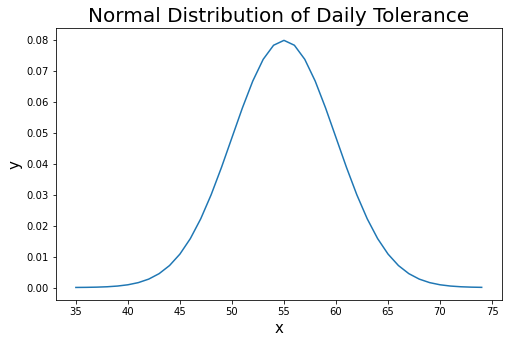

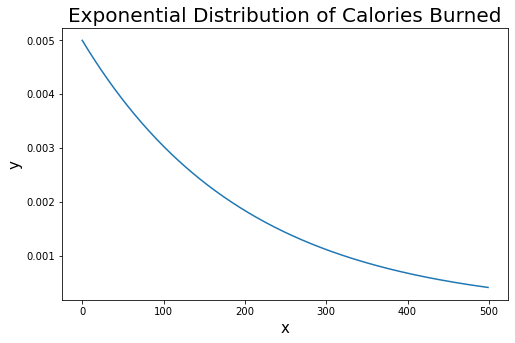

In [100]:
x_vals1 = np.arange(35, 75, 1)
plt.figure(figsize = (8, 5))
plt.plot(x_vals1, norm.pdf(x_vals1, avg_tol, sd_tol))
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Normal Distribution of Daily Tolerance', fontsize = 20)

x_vals2 = np.arange(0, 500, 1)
plt.figure(figsize = (8, 5))
plt.plot(x_vals2, expon.pdf(x_vals2, 0, avg_calories_burned))
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Exponential Distribution of Calories Burned', fontsize = 20)

In [101]:
def get_calories_burned(lower_temp, higher_temp, avg_tol, sd_tol, avg_calories_burned):
    
    temp = np.random.uniform(lower_temp, higher_temp)   # uniform distribution
    tol = np.random.normal(avg_tol, sd_tol)   # normal distribution
    
    if temp > tol:
        cals = np.random.exponential(avg_calories_burned)
    else:
        cals = 0
    
    return cals

In [102]:
num_days = 100000
daily_calories = []

start = time()
for _ in range(num_days):
    cals = get_calories_burned(lower_temp, higher_temp, avg_tol, sd_tol, avg_calories_burned)
    daily_calories.append(cals)
end = time()
print('время(с):', end - start)
print('среднее количество калорий:', np.mean(daily_calories))

время(с): 0.5515210628509521
среднее количество калорий: 53.79965528468808


Text(0.5, 1.0, '53.79965528468808')

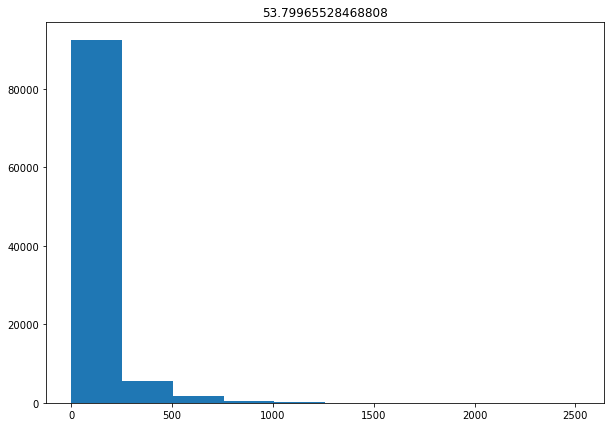

In [103]:
plt.figure(figsize = (10, 7))
plt.hist(daily_calories)
plt.title(np.mean(daily_calories))

In [104]:
print(len([i for i in daily_calories if i == 0]) / num_days)

0.72968


## Efficient Method: Vectorization 

In [106]:
start = time()

# получим все значения температуры temps одновременно
temps = np.random.uniform(40, 60, num_days)

# получим все значения комфортной температуры tols одновременно
tols = np.random.normal(55, 5, num_days)

# получим все значения калорий одновременно
daily_calories = np.random.exponential(200, num_days)

# если temp меньше, чем tols, то человек не бегал
daily_calories[temps < tols] = 0

end = time()
print(end - start)

0.011003255844116211


Text(0.5, 1.0, '53.884063045108086')

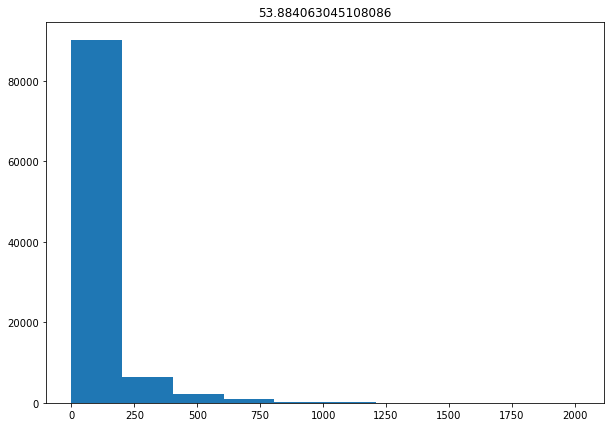

In [108]:
plt.figure(figsize = (10, 7))
plt.hist(daily_calories)
plt.title(np.mean(daily_calories))

In [109]:
print(len([i for i in daily_calories if i == 0]) / num_days)

0.72883
